In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import time

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [8]:
# !pip install tapi-yandex-metrika

In [ ]:
# !pip install --upgrade tapi-yandex-metrika==2020.10.20

In [10]:
from tapi_yandex_metrika import YandexMetrikaStats

[Создание приложения](https://oauth.yandex.ru/client/new/)

Отладочный токен:
https://oauth.yandex.ru/authorize?response_type=token&client_id=e08c5606a4764d09b0bff31f36281c9a

In [66]:
from id_data import yandex

In [68]:
ACCESS_TOKEN = yandex['ACCESS_TOKEN']
METRIC_IDS = yandex['METRIC_IDS']

In [70]:
api = YandexMetrikaStats(
    access_token=ACCESS_TOKEN,
)

Количество уникальных пользователей и визитов по дням за последние 30 дней

In [72]:
params = {
    'ids': METRIC_IDS, # наш счетчик
    'date1': '30daysAgo',
    'date2': 'yesterday',
    'sort': 'ym:s:date',
    'metrics': 'ym:s:users, ym:s:visits', # значения, которые получим
    'dimensions': 'ym:s:date', # группировка
    'accuracy': 'full',
    'limit': 1000 # количество элементов на странице
}

In [74]:
raw_result = api.stats().get(params=params)
raw_result

<TapiClient object
{   'contains_sensitive_data': False,
    'data': [   {   'dimensions': [{'name': '2025-02-26'}],
                    'metrics': [119.0, 133.0]},
                {   'dimensions': [{'name': '2025-02-27'}],
                    'metrics': [119.0, 143.0]},
                {   'dimensions': [{'name': '2025-02-28'}],
                    'metrics': [226.0, 237.0]},
                {   'dimensions': [{'name': '2025-03-01'}],
                    'metrics': [45.0, 50.0]},
                {   'dimensions': [{'name': '2025-03-02'}],
                    'metrics': [37.0, 38.0]},
                {   'dimensions': [{'name': '2025-03-03'}],
                    'metrics': [91.0, 94.0]},
                {   'dimensions': [{'name': '2025-03-04'}],
                    'metrics': [97.0, 108.0]},
                {   'dimensions': [{'name': '2025-03-05'}],
                    'metrics': [93.0, 100.0]},
                {   'dimensions': [{'name': '2025-03-06'}],
                    'metric

In [76]:
result = raw_result['data']

In [78]:
dict_data = {}

for i in range(len(result)):
    dict_data[i] = {
        'date': result[i]['dimensions'][0]['name'],
        'users': result[i]['metrics'][0],
        'visits': result[i]['metrics'][1]
    }

In [80]:
attendance = pd.DataFrame(dict_data).T

In [82]:
attendance

,date,users,visits
0,2025-02-26,119.0,133.0
1,2025-02-27,119.0,143.0
2,2025-02-28,226.0,237.0
3,2025-03-01,45.0,50.0
4,2025-03-02,37.0,38.0
5,2025-03-03,91.0,94.0
6,2025-03-04,97.0,108.0
7,2025-03-05,93.0,100.0
8,2025-03-06,104.0,111.0
9,2025-03-07,66.0,71.0


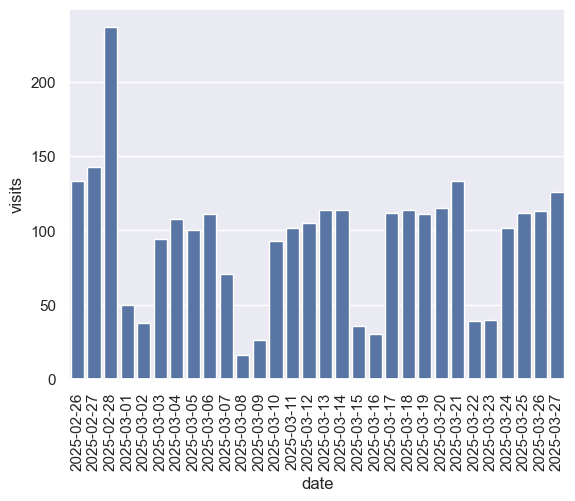

In [84]:
sns.barplot(data=attendance, x='date', y='visits')
plt.xticks(rotation=90);

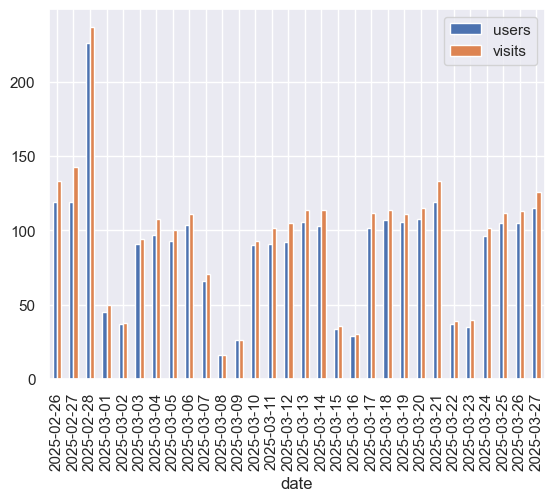

In [86]:
attendance.plot.bar(x='date');